In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,BatchNormalization,Input,Bidirectional,Conv1D,MaxPooling1D,Flatten
from tensorflow.keras import regularizers
import tensorflow as tf
import numpy as np

In [2]:
df = []
for i in range(0,5):
    df.append(pd.read_csv(f'history_log_{i}.csv'))

In [3]:
model = Sequential([
        Conv1D(128,3, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), input_shape=(256, 3)),
        Dropout(0.2),
        LSTM(10, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), input_shape=(256,3), return_sequences = False ),
        Dropout(0.2),
        Flatten(),
        Dense(100),
        Dense(2, activation = 'softmax') 
        ])

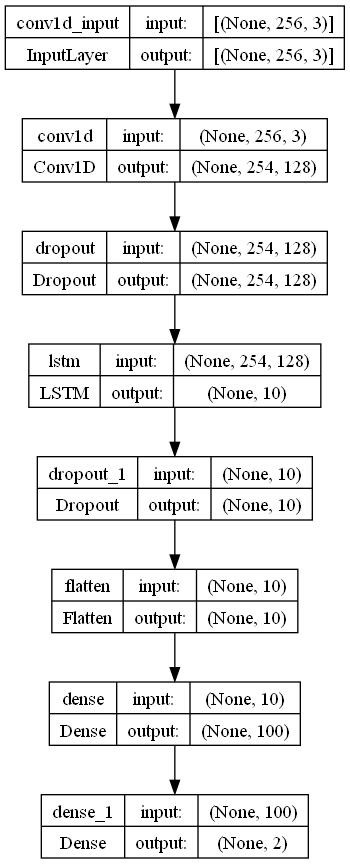

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True)

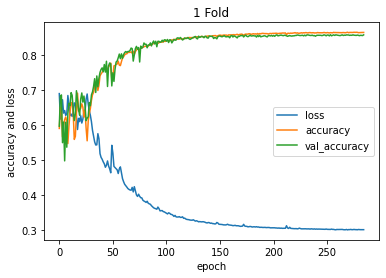

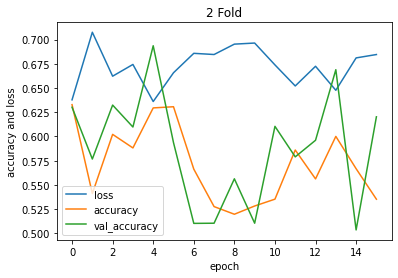

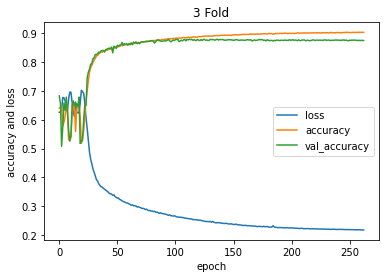

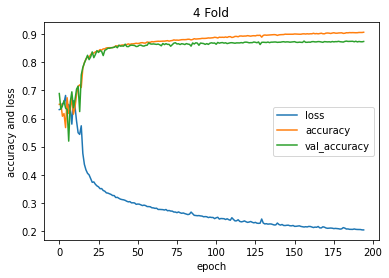

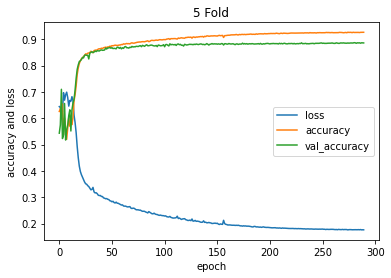

In [5]:
for i in range(len(df)):
    plot = df[i][:].reset_index()[['loss','accuracy','val_accuracy']].plot(title = f'{i+1} Fold',xlabel = 'epoch',ylabel = 'accuracy and loss')
    fig = plot.get_figure()
    fig.savefig(f'{i}_fold.png')    

In [6]:
from IPython.display import display
for i in range(len(df)):
    display(df[i][df[i]['epoch']==0])

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.591414,0.691008,0.597717,0.657146


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.632807,0.637779,0.630123,0.620146


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.640436,0.625925,0.682864,0.581819


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.650294,0.631721,0.688743,0.589184


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.625793,0.644316,0.543317,0.705883


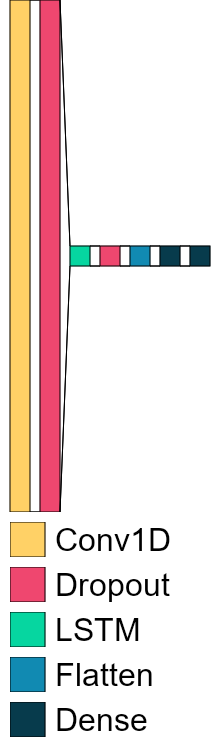

In [7]:
from PIL import ImageFont
import visualkeras
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font,draw_volume=False)  # font is optional!

In [8]:
table = []
for i in range(len(df)):
    display(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
    table.append(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
table = pd.concat(table)

,epoch,accuracy,loss,val_accuracy,val_loss
253,253,0.865291,0.302571,0.859391,0.315745


,epoch,accuracy,loss,val_accuracy,val_loss
4,4,0.629444,0.636021,0.693585,0.588137


,epoch,accuracy,loss,val_accuracy,val_loss
112,112,0.885353,0.256496,0.879647,0.281332


,epoch,accuracy,loss,val_accuracy,val_loss
156,156,0.900995,0.21436,0.875151,0.291387


,epoch,accuracy,loss,val_accuracy,val_loss
280,280,0.925823,0.176722,0.887083,0.28481


In [9]:
import pickle

# open a file, where you stored the pickled data
file = open('scores', 'rb')
# dump information to that file
scores = pickle.load(file)
# close the file
file.close()

# open a file, where you stored the pickled data
file = open('evaluations', 'rb')
# dump information to that file
evaluations = pickle.load(file)
# close the file
file.close()


In [10]:
scores = np.asarray(scores).T

In [11]:
scores

array([[0.8456083 , 0.8457546 , 0.8454621 ],
       [0.70318335, 0.7034268 , 0.70294017],
       [0.8545134 , 0.85472035, 0.85430646],
       [0.84870076, 0.8489064 , 0.8484953 ],
       [0.8280109 , 0.82821155, 0.82781047]], dtype=float32)

In [12]:
df3 = pd.DataFrame(scores,columns = ['f1','recalls','precisions'])

In [13]:
df3

,f1,recalls,precisions
0,0.845608,0.845755,0.845462
1,0.703183,0.703427,0.702940
2,0.854513,0.854720,0.854306
3,0.848701,0.848906,0.848495
4,0.828011,0.828212,0.827810


In [14]:
np.asarray(evaluations)[:,1]

array([0.84553128, 0.70307851, 0.8544448 , 0.84870285, 0.82801801])

In [15]:
df3

,f1,recalls,precisions
0,0.845608,0.845755,0.845462
1,0.703183,0.703427,0.702940
2,0.854513,0.854720,0.854306
3,0.848701,0.848906,0.848495
4,0.828011,0.828212,0.827810


In [16]:
df2 = table[['accuracy','val_accuracy','epoch']].reset_index()
df2 = pd.concat([df2,df3],axis = 1)
df2['test_accuracy'] = np.asarray(evaluations)[:,1]


In [17]:
s = pd.DataFrame([df2.sum()])/5

In [18]:
df2 = pd.concat([df2,s])

In [19]:
df2 = ((df2*10000)//1)/10000

In [20]:
df2.to_csv('table.csv')

In [21]:
df2

,index,accuracy,val_accuracy,epoch,f1,recalls,precisions,test_accuracy
0,253.0,0.8652,0.8593,253.0,0.8456,0.8457,0.8454,0.8455
1,4.0,0.6294,0.6935,4.0,0.7031,0.7034,0.7029,0.7030
2,112.0,0.8853,0.8796,112.0,0.8545,0.8547,0.8543,0.8544
3,156.0,0.9009,0.8751,156.0,0.8487,0.8489,0.8484,0.8487
4,280.0,0.9258,0.8870,280.0,0.8280,0.8282,0.8278,0.8280
0,161.0,0.8413,0.8389,161.0,0.8160,0.8162,0.8158,0.8159
